In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
# df = pd.read_csv("https://info.dengue.mat.br/datasets/notificacao/20102023/weather_notification_SC_2010-01-01_2023-08-30.csv")

In [3]:
url = "../data/weather_notification_CE_2010-01-01_2023-08-30.csv"

df = pd.read_csv(url,index_col=[0]).reset_index(drop=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421454 entries, 0 to 1421453
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   uf              1421454 non-null  object 
 1   geocodigo       1421454 non-null  int64  
 2   nome_municipio  1421454 non-null  object 
 3   dt_notific      1421454 non-null  object 
 4   se_notif        1421454 non-null  int64  
 5   ano_notif       1421454 non-null  int64  
 6   temp_med        1421454 non-null  float64
 7   precip_med      1421454 non-null  float64
 8   pressao_med     1421454 non-null  float64
 9   umid_med        1421454 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 108.4+ MB


In [4]:
df.head()

uf  geocodigo     nome_municipio  dt_notific  se_notif  ano_notif  \
0  Ceará    2301901           Barbalha  2020-01-14         3       2020   
1  Ceará    2303709            Caucaia  2020-05-11        20       2020   
2  Ceará    2301109            Aracati  2020-07-01        27       2020   
3  Ceará    2301109            Aracati  2020-07-01        27       2020   
4  Ceará    2307601  Limoeiro do Norte  2020-08-26        35       2020   

    temp_med  precip_med  pressao_med   umid_med  
0  26.163765    0.059119     0.998894  70.432110  
1  27.493801    0.087865     0.999981  79.137405  
2  26.853367    0.000000     0.998795  72.478516  
3  26.853367    0.000000     0.998795  72.478516  
4  28.348515    0.000000     0.999007  57.109390

In [5]:
cols = ['uf', 'geocodigo', 'nome_municipio', 'dt_notific', 'se_notif', 'ano_notif', 'precip_med', 'pressao_med', 'temp_med', 'umid_med']

df_combined = df[cols] \
    .groupby(['uf', 'nome_municipio', 'se_notif', 'ano_notif', 'geocodigo']) \
    .agg(casos_notif=('dt_notific', 'count'),
         precip_med=('precip_med', 'mean'),
         pressao_med=('pressao_med', 'mean'),
         temp_med=('temp_med', 'mean'),
         umid_med=('umid_med', 'mean')).reset_index() \
    .sort_values(['ano_notif', 'se_notif'], ascending=[False, False])

print('Total de registros: ',len(df_combined),'\n')

print(df_combined.head())


Total de registros:  62299 

         uf nome_municipio  se_notif  ano_notif  geocodigo  casos_notif  \
3459  Ceará        Aracati        33       2023    2301109            1   
5057  Ceará       Arneiroz        33       2023    2301505            1   
7287  Ceará          Barro        33       2023    2302008            2   
8527  Ceará       Beberibe        33       2023    2302206            1   
8966  Ceará      Bela Cruz        33       2023    2302305            1   

      precip_med  pressao_med   temp_med   umid_med  
3459    0.000000     0.999171  27.568878  65.533005  
5057    0.000000     1.000504  26.494770  46.976124  
7287    0.000014     1.001678  25.600216  54.730293  
8527    0.000000     1.000247  26.820229  67.659424  
8966    0.003045     0.998471  27.932941  67.897530  


# Análise Exploratória dos Dados

- Investigar as relações entre casos de dengue, temperatura e umidade ao longo do tempo.

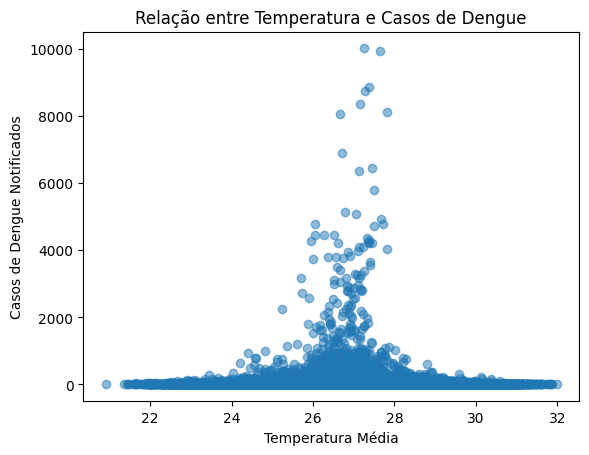

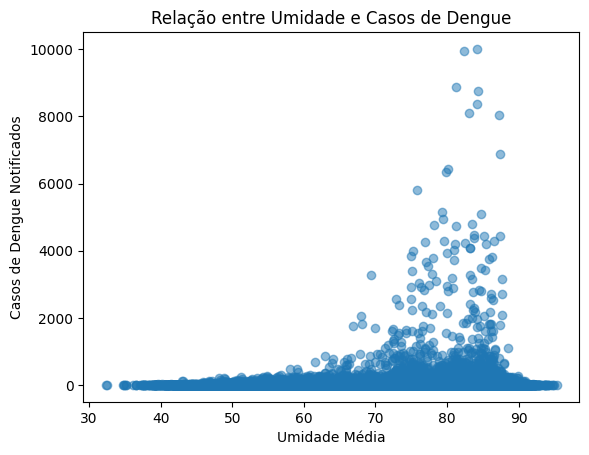

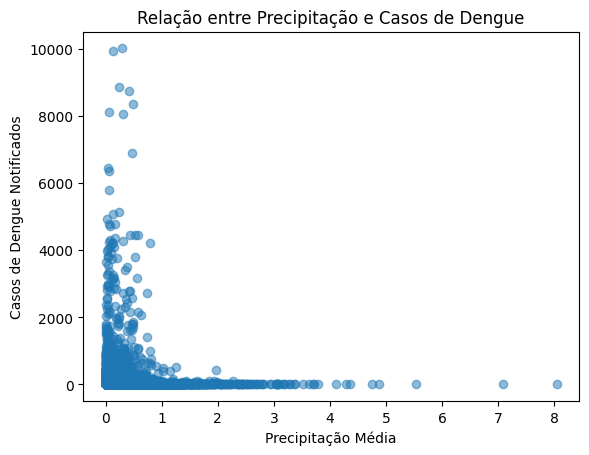

In [6]:
# Análise exploratória dos dados
plt.scatter(df_combined['temp_med'], df_combined['casos_notif'], alpha=0.5)
plt.xlabel('Temperatura Média')
plt.ylabel('Casos de Dengue Notificados')
plt.title('Relação entre Temperatura e Casos de Dengue')
plt.show()

plt.scatter(df_combined['umid_med'], df_combined['casos_notif'], alpha=0.5)
plt.xlabel('Umidade Média')
plt.ylabel('Casos de Dengue Notificados')
plt.title('Relação entre Umidade e Casos de Dengue')
plt.show()

plt.scatter(df_combined['precip_med'], df_combined['casos_notif'], alpha=0.5)
plt.xlabel('Precipitação Média')
plt.ylabel('Casos de Dengue Notificados')
plt.title('Relação entre Precipitação e Casos de Dengue')
plt.show()


/home/esloch/.cache/pypoetry/virtualenvs/ml-dengue-predict-2UTvfTph-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/esloch/.cache/pypoetry/virtualenvs/ml-dengue-predict-2UTvfTph-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/esloch/.cache/pypoetry/virtualenvs/ml-dengue-predict-2UTvfTph-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


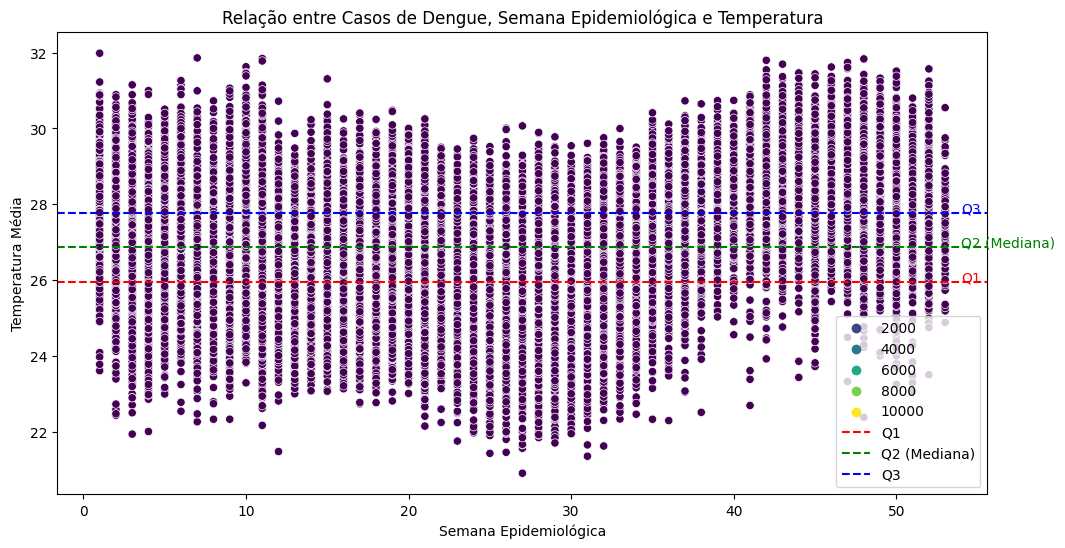

In [7]:
# Gráfico de dispersão de casos de dengue e temperatura
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_combined, 
       x='se_notif', 
       y='temp_med', 
       hue='casos_notif', 
       palette='viridis'
)

# Calcular os quartis da temperatura
Q1 = df_combined['temp_med'].quantile(0.25)
Q3 = df_combined['temp_med'].quantile(0.75)

# Desenhar linhas verticais para dividir os dados em quartis
plt.axhline(Q1, color='r', linestyle='--', label='Q1')
plt.axhline((Q1 + Q3) / 2, color='g', linestyle='--', label='Q2 (Mediana)')
plt.axhline(Q3, color='b', linestyle='--', label='Q3')

# Configurar os rótulos dos quartis
plt.text(df_combined['se_notif'].max() + 1, Q1, 'Q1', color='r')
plt.text(df_combined['se_notif'].max() + 1, (Q1 + Q3) / 2, 'Q2 (Mediana)', color='g')
plt.text(df_combined['se_notif'].max() + 1, Q3, 'Q3', color='b')

plt.xlabel('Semana Epidemiológica')
plt.ylabel('Temperatura Média')
plt.title('Relação entre Casos de Dengue, Semana Epidemiológica e Temperatura')
plt.legend()
plt.show()


/home/esloch/.cache/pypoetry/virtualenvs/ml-dengue-predict-2UTvfTph-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/esloch/.cache/pypoetry/virtualenvs/ml-dengue-predict-2UTvfTph-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/esloch/.cache/pypoetry/virtualenvs/ml-dengue-predict-2UTvfTph-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


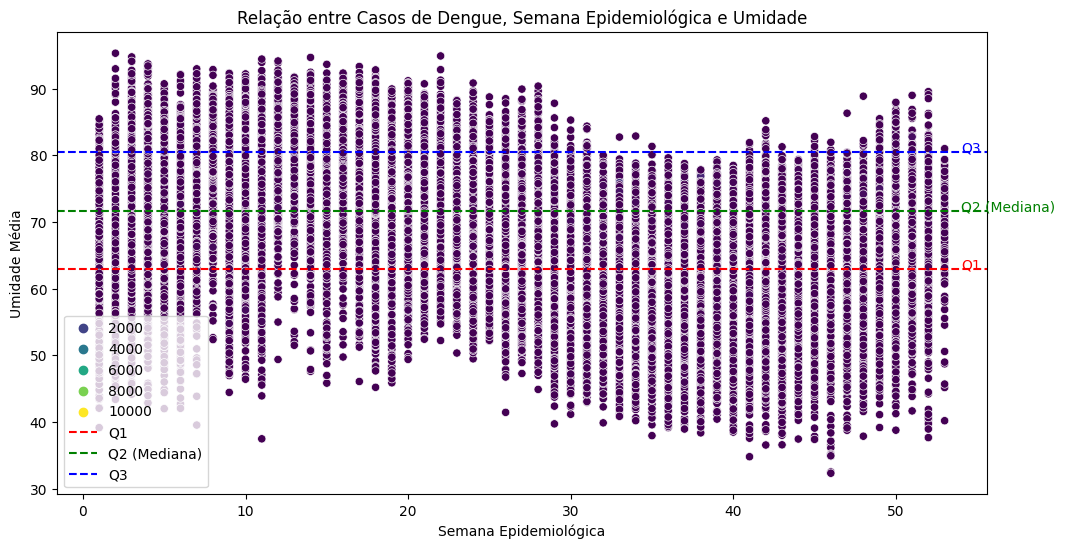

In [8]:
# Gráfico de dispersão de casos de dengue e temperatura
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_combined, 
    x='se_notif', 
    y='umid_med', 
    hue='casos_notif', 
    palette='viridis'
)

# Calcular os quartis da temperatura
Q1 = df_combined['umid_med'].quantile(0.25)
Q3 = df_combined['umid_med'].quantile(0.75)

# Desenhar linhas verticais para dividir os dados em quartis
plt.axhline(Q1, color='r', linestyle='--', label='Q1')
plt.axhline((Q1 + Q3) / 2, color='g', linestyle='--', label='Q2 (Mediana)')
plt.axhline(Q3, color='b', linestyle='--', label='Q3')

# Configurar os rótulos dos quartis
plt.text(df_combined['se_notif'].max() + 1, Q1, 'Q1', color='r')
plt.text(df_combined['se_notif'].max() + 1, (Q1 + Q3) / 2, 'Q2 (Mediana)', color='g')
plt.text(df_combined['se_notif'].max() + 1, Q3, 'Q3', color='b')

plt.xlabel('Semana Epidemiológica')
plt.ylabel('Umidade Média')
plt.title('Relação entre Casos de Dengue, Semana Epidemiológica e Umidade')
plt.legend()
plt.show()


/home/esloch/.cache/pypoetry/virtualenvs/ml-dengue-predict-2UTvfTph-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/esloch/.cache/pypoetry/virtualenvs/ml-dengue-predict-2UTvfTph-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/esloch/.cache/pypoetry/virtualenvs/ml-dengue-predict-2UTvfTph-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/esloch/.cache/pypoetry/virtualenvs/ml-dengu

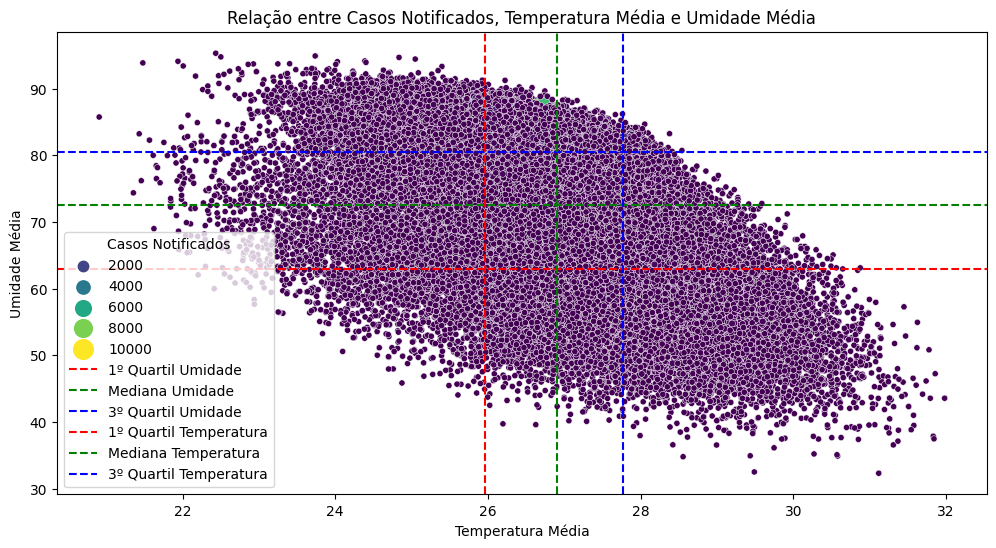

In [9]:
# Criar um gráfico de dispersão com cores representando os casos notificados
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp_med', y='umid_med', hue='casos_notif', data=df_combined, palette='viridis', size='casos_notif', sizes=(20, 200))
plt.xlabel('Temperatura Média')
plt.ylabel('Umidade Média')
plt.title('Relação entre Casos Notificados, Temperatura Média e Umidade Média')

# Calcular e traçar quartis e medianas para os eixos x e y
quartis_temp = np.percentile(df_combined['temp_med'], [25, 50, 75])
quartis_umid = np.percentile(df_combined['umid_med'], [25, 50, 75])

plt.axhline(quartis_umid[0], color='r', linestyle='--', label='1º Quartil Umidade')
plt.axhline(quartis_umid[1], color='g', linestyle='--', label='Mediana Umidade')
plt.axhline(quartis_umid[2], color='b', linestyle='--', label='3º Quartil Umidade')

plt.axvline(quartis_temp[0], color='r', linestyle='--', label='1º Quartil Temperatura')
plt.axvline(quartis_temp[1], color='g', linestyle='--', label='Mediana Temperatura')
plt.axvline(quartis_temp[2], color='b', linestyle='--', label='3º Quartil Temperatura')

plt.legend(title='Casos Notificados')
plt.show()


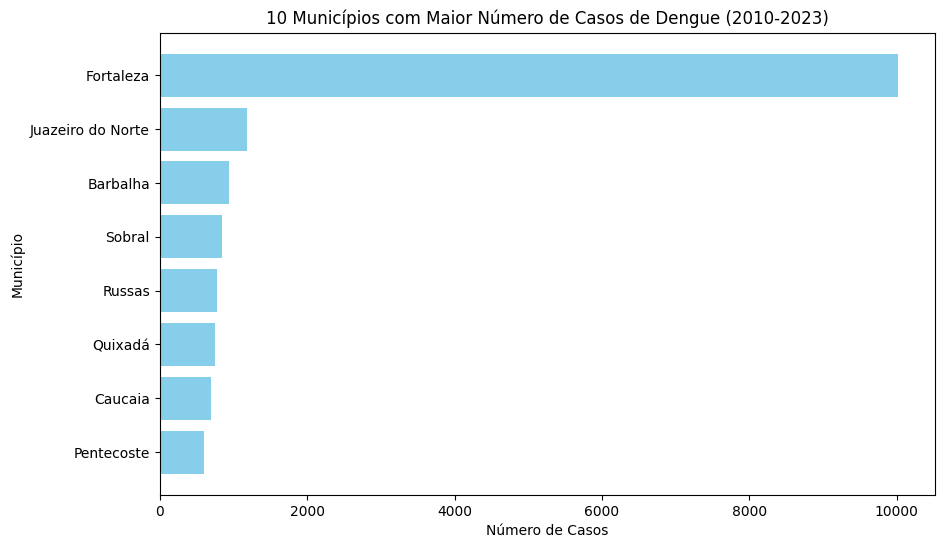

In [10]:
# Encontrar o município com o maior número de casos em cada ano.
max_cases_df = df_combined[df_combined['ano_notif'].between(2010, 2023)]  # Filtra para os anos desejados
max_cases_df = max_cases_df.groupby(['ano_notif', 'geocodigo'])['casos_notif'].max().reset_index()
max_cases_df = max_cases_df.sort_values(by=['casos_notif'], ascending=False)

# Selecionar apenas os 10 municípios com mais casos.
top_10_municipios = max_cases_df.head(20)

# Obter os nomes dos municípios correspondentes.
top_10_municipios = top_10_municipios.merge(df_combined[['geocodigo', 'nome_municipio']], on='geocodigo', how='left')

# Criar o gráfico de barras horizontais.
plt.figure(figsize=(10, 6))
plt.barh(top_10_municipios['nome_municipio'], top_10_municipios['casos_notif'], color='skyblue')
plt.xlabel('Número de Casos')
plt.ylabel('Município')
plt.title('10 Municípios com Maior Número de Casos de Dengue (2010-2023)')
plt.gca().invert_yaxis()  # Inverte o eixo y para que o maior número de casos fique no topo
plt.show()


 ## Train and Test

 
 Criar um modelo que possa aprender a relação entre as características de entrada (X) e os valores de destino (y).

In [11]:
# Características de entrada que o modelo usará para fazer previsões
X = df_combined[['temp_med', 'umid_med', 'se_notif', 'ano_notif', 'geocodigo']]

# Valores que o modelo tentará prever com base nas características
y = df_combined['casos_notif']
 

O conjunto de treinamento é usado para ensinar o modelo, e o conjunto de teste é usado para avaliar o quão bem ele está realizando previsões em dados que não foram vistos durante o treinamento.


In [12]:
# Dividir os dados (características e rótulos) em quatro conjuntos: X_train, X_test, y_train e y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Criar uma instância do modelo com os hiperparâmetros desejados
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo com os dados de treinamento
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Avaliação do Modelo

Nesta fase, o objetivo principal é medir o desempenho do modelo e determinar quão bem ele está funcionando

In [14]:
#####
# Fazer previsões com o modelo nos dados de teste
y_pred = rf_model.predict(X_test)

# Calcule o RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcule o R-squared
r_squared = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R-squared: {r_squared}')


RMSE: 66.3533501235951
R-squared: 0.857773009212836


RMSE (Root Mean Square Error): O RMSE é uma métrica que mede a média dos erros quadrados entre as previsões do modelo e os valores reais. Ele fornece uma medida da dispersão dos erros. Quanto menor o valor do RMSE, melhor o modelo está em ajustar-se aos dados.

R-squared (R²): O R-squared, também conhecido como coeficiente de determinação, é uma métrica que varia de 0 a 1. Ele representa a proporção da variabilidade nos dados que é explicada pelo modelo. Um valor de R² próximo de 1 indica que o modelo explica uma grande parte da variabilidade nos dados, enquanto um valor próximo de 0 significa que o modelo não explica bem os dados. 

O RMSE relativamente baixo e o alto R² sugerem que o modelo está fazendo boas previsões e explicando uma grande parte da variabilidade nos dados. 

### Importância de cada recruso
**feature_importances_** fornece informações sobre a importância relativa de cada recurso (ou variável) no processo de tomada de decisão do modelo. É uma métrica útil para entender quais recursos estão contribuindo mais para a capacidade preditiva do modelo.

 Características com importância muito baixa podem ser excluídas do modelo para simplificá-lo, reduzir o overfitting e acelerar o treinamento.

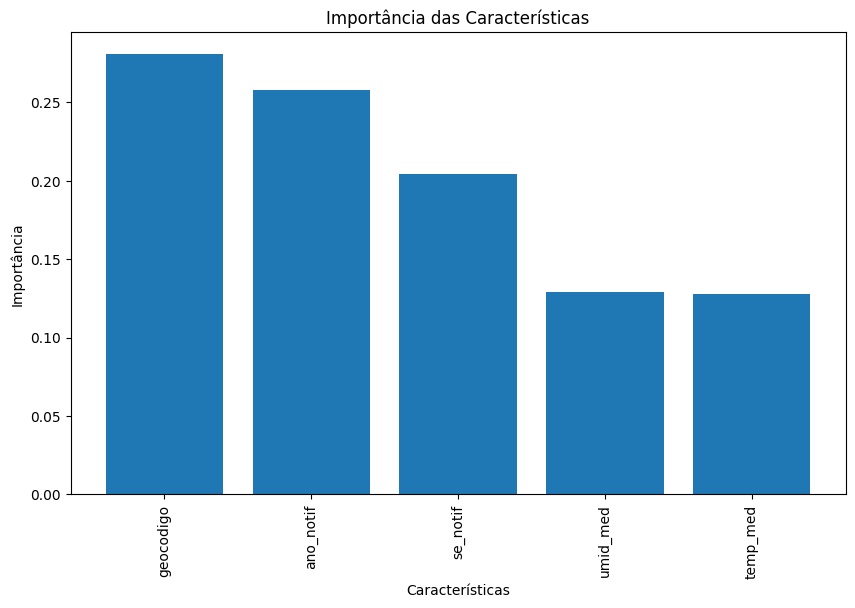

In [15]:
# Obter a importância das características do modelo
feature_importances = rf_model.feature_importances_

# Obter as colunas de características
feature_names = X_train.columns

# Classificar as características por importância
indices = feature_importances.argsort()[::-1]

# Plotar a importância das características
plt.figure(figsize=(10, 6))
plt.title("Importância das Características")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Características")
plt.ylabel("Importância")
plt.show()


## Visualizar as predições do modelo


In [16]:
#### Filtrando o dataset para estimar os casos de dengue com base nas notificações em um determinado periodo
# Selecionar o município com maior numero de casos
geocodigo_desejado = 2304400

# Filtrar os dados para o geocódigo e o período de 2010 a 2023
df_filtered = df_combined[(df_combined['geocodigo'] == geocodigo_desejado) &
                          (df_combined['ano_notif'].between(2010, 2023))]

# Selecionar as colunas relevantes
cols = ['ano_notif', 'se_notif', 'casos_notif']

# Separar os dados em __ (X) e rótulos (y)
X = df_filtered[['se_notif', 'ano_notif']]
y = df_filtered['casos_notif']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo RandomForest
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo com os dados de treinamento
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
# Avaliação do Modelo:
######

# Faça previsões com o modelo nos dados de teste
y_pred = regressor.predict(X_test)

# Calcule o RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcule o R-squared
r_squared = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R-squared: {r_squared}')


RMSE: 465.635368721273
R-squared: 0.9362910878712636


In [18]:
# Criar um DataFrame com as semanas epidemiológicas de 2018 a 2023
weeks_2018_2023 = pd.DataFrame(
    {
        'se_notif': list(range(1, 53)) * 6, 
        'ano_notif': [2018] * 52 + [2019] * 52 + [2020] * 52 + [2021] * 52 + [2022] * 52 + [2023] * 52
    })

# Prever os casos estimados para 2018 a 2023
y_pred_2018_2023 = regressor.predict(weeks_2018_2023)
weeks_2018_2023['casos_estimados'] = y_pred_2018_2023


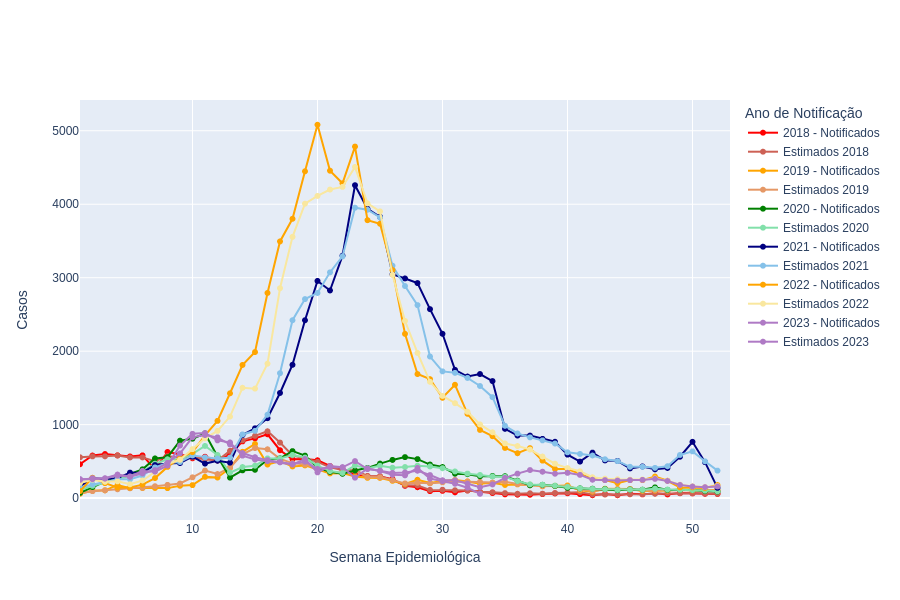

In [19]:
# Mesclar com os casos reais (casos_notif) para 2018 a 2023
casos_notif_2018_2023 = df_filtered[df_filtered['ano_notif'].between(2018, 2023)]
merged_2018_2023 = pd.merge(weeks_2018_2023, casos_notif_2018_2023, on=['ano_notif', 'se_notif'], how='left')

# Mapear as cores para os anos e os casos estimados
colors = {
    2018: 'rgba(255, 0, 0, 1)',  # Vermelho forte
    'Estimados 2018': 'rgb(205, 97, 85)',  # Vermelho fraco
    2019: 'rgba(255, 165, 0, 1)',  # Laranja forte
    'Estimados 2019': 'rgb(229, 152, 102)',  # Laranja fraco
    2020: 'rgba(0, 128, 0, 1)',  # Verde forte
    'Estimados 2020': 'rgb(130, 224, 170)',  # Verde fraco
    2021: 'rgba(0, 0, 128, 1)',  # Azul forte
    'Estimados 2021': 'rgb(133, 193, 233)',  # Azul fraco
    2022: 'rgba(255, 165, 0, 1)',  # Amarelo forte
    'Estimados 2022': 'rgb(249, 231, 159)',  # Amarelo fraco
    2023: 'rgba(175, 122, 197, 1)',  # Marrom forte
    'Estimados 2023': 'rgb(175, 122, 197)'  # Marrom fraco
}

fig = go.Figure()

# Adicionar as linhas para casos notificados e estimados
for ano in [2018, 2019, 2020, 2021, 2022, 2023]:
    df_ano = merged_2018_2023[merged_2018_2023['ano_notif'] == ano]
    fig.add_trace(go.Scatter(x=df_ano['se_notif'], y=df_ano['casos_notif'], mode='lines+markers',
                             name=str(ano) + ' - Notificados', line=dict(color=colors[ano]),
                             text=df_ano["ano_notif"],
                             customdata=df_ano['se_notif'],
                             hovertemplate='Ano: %{text}<br>SE: %{customdata}<br>Casos Notificados: %{y}'"<extra></extra>"))
    fig.add_trace(go.Scatter(x=df_ano['se_notif'], y=df_ano['casos_estimados'].astype(int), mode='lines+markers',
                             name='Estimados ' + str(ano), line=dict(color=colors['Estimados ' + str(ano)]),
                             text=df_ano["ano_notif"],
                             customdata=df_ano['se_notif'],
                             hovertemplate='Ano: %{text}<br>SE: %{customdata}<br>Casos Estimados: %{y}'"<extra></extra>"))

# Personalizar o layout do gráfico
fig.update_layout(xaxis_title='Semana Epidemiológica', yaxis_title='Casos',
                  hovermode="x",
                  xaxis=dict(range=[1, 53]),  # Define o limite mínimo do eixo x
                  autosize=False,
                  height=600,
                  width=1280,
                  legend_title_text='Ano de Notificação')

# Plotar o gráfico interativo
fig.show()
